In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 964.2 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.5 MB 964.2 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.5 MB 769.2 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.5 MB 845.5 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.5 MB 845.5 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.5 MB 809.5 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.5 MB 809.5 kB/s eta 0:00:13
   ----- --------------

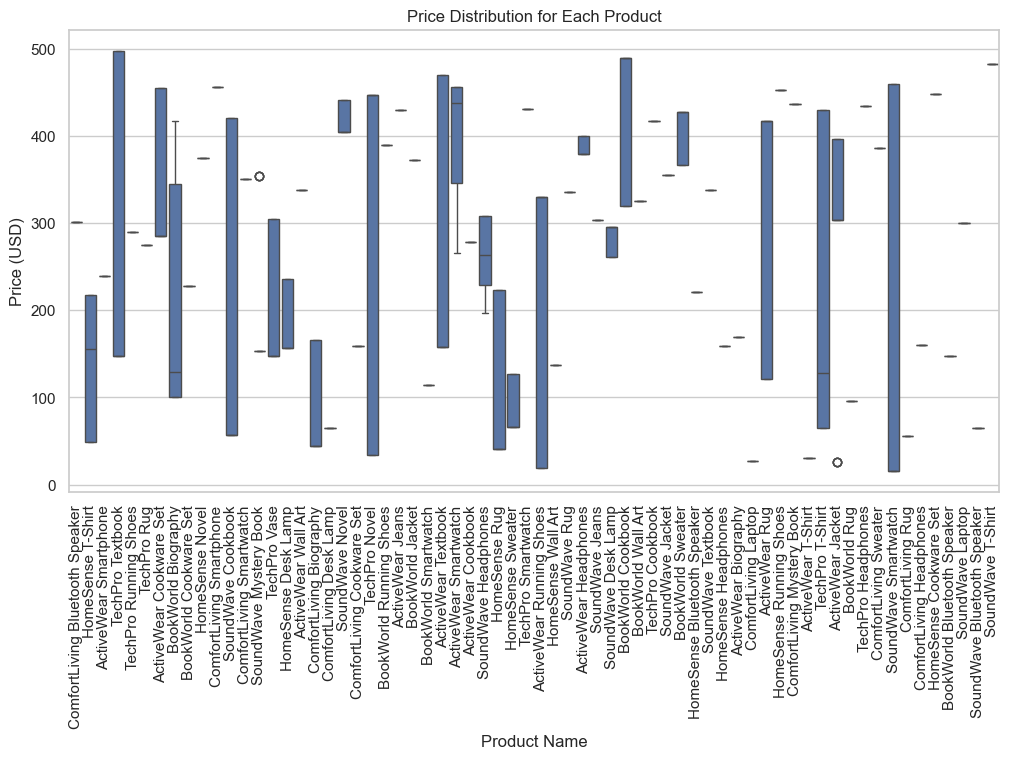

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Step 2: Map the Product Name to Transactions using ProductID
transactions['ProductName'] = transactions['ProductID'].map(products.set_index('ProductID')['ProductName'])

# Step 3: Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=transactions, x="ProductName", y="Price")

# Step 4: Customize the plot
plt.title("Price Distribution for Each Product")
plt.xlabel("Product Name")
plt.ylabel("Price (USD)")
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()




Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T001

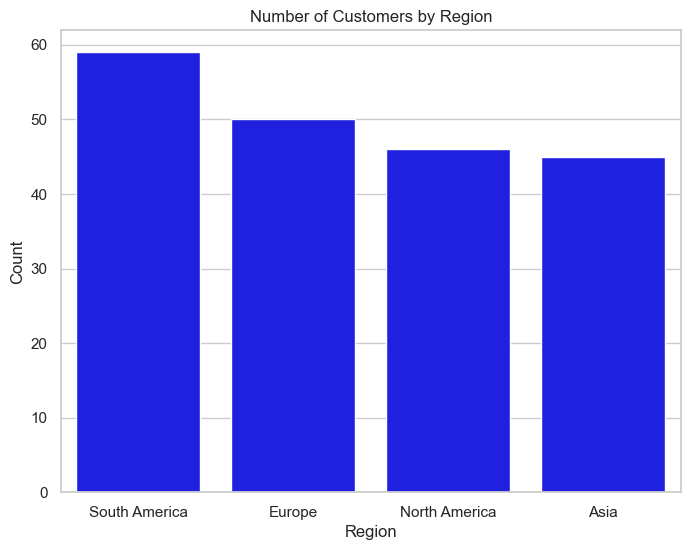

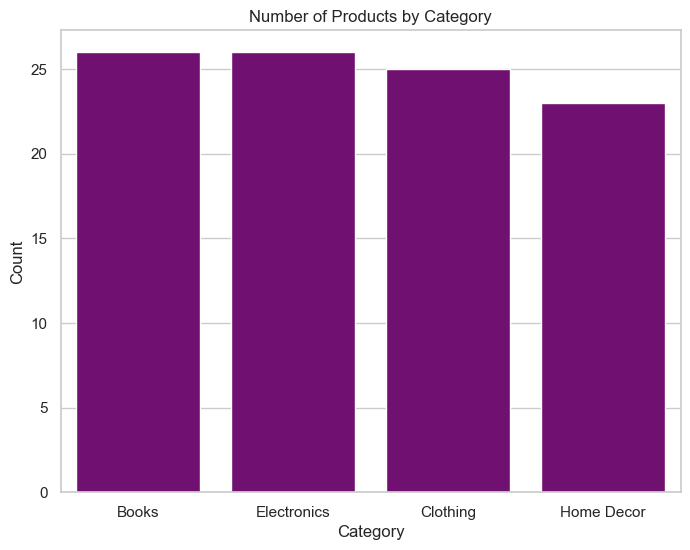

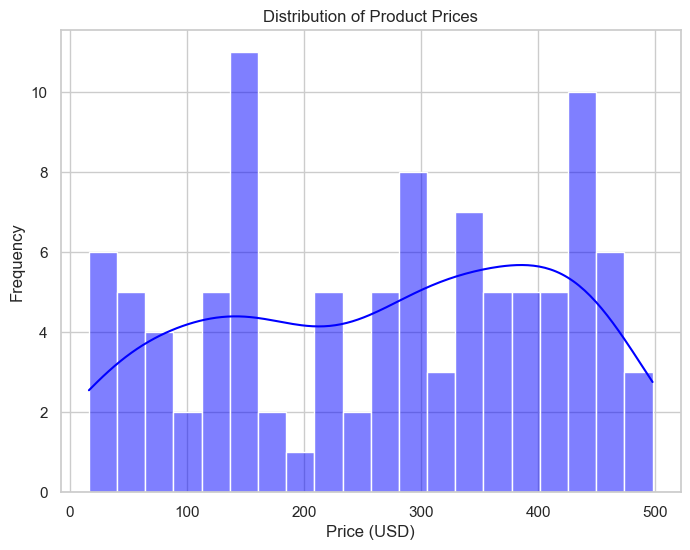

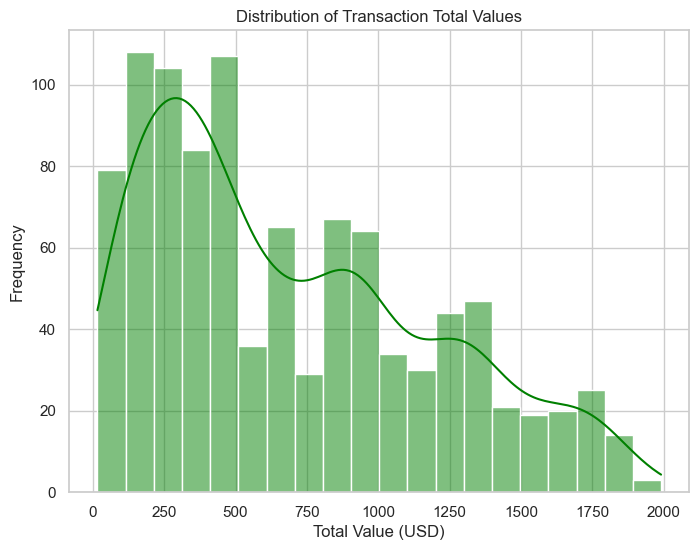

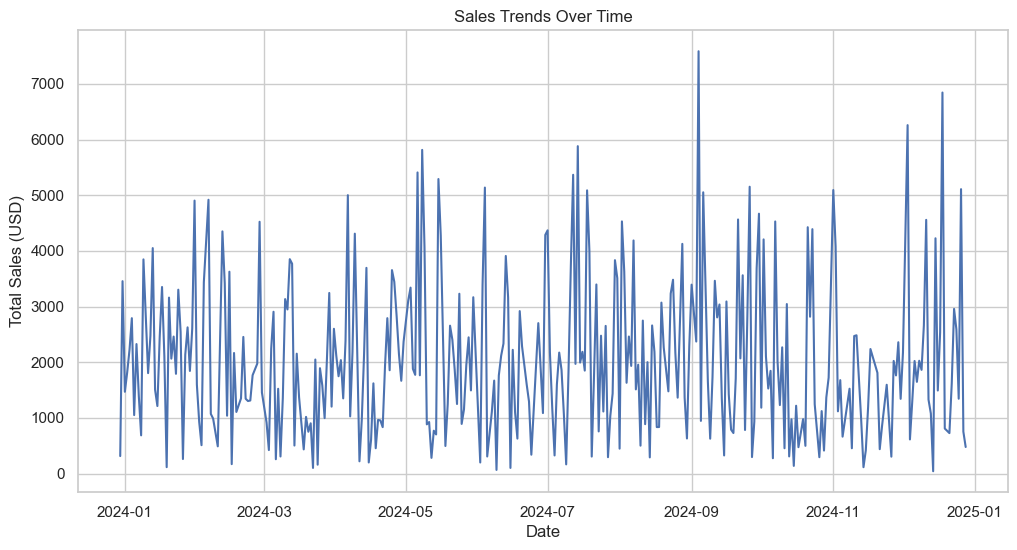

C:\Users\bhavi\AppData\Local\Temp\ipykernel_15104\2056401977.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")


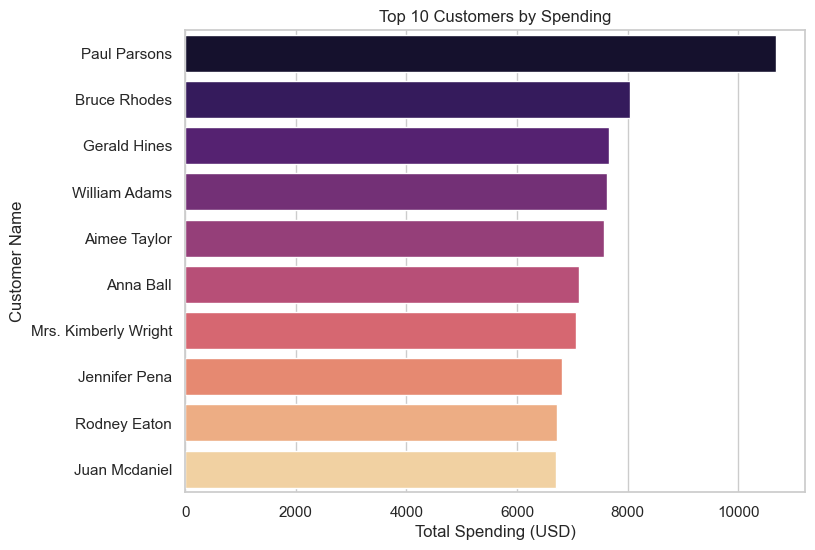

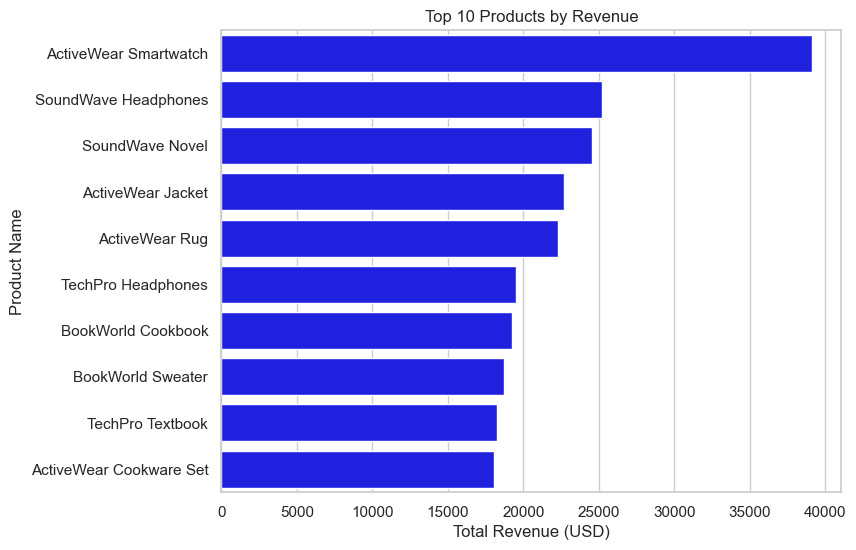

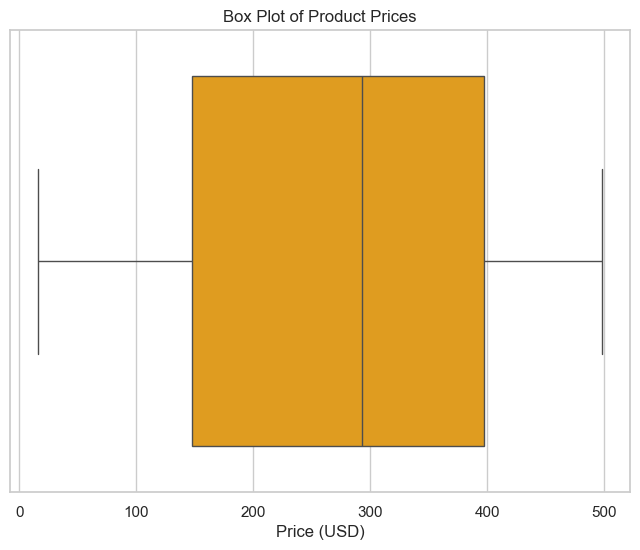

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# ---- 1. Basic Overview ----
# Display the first few rows of each dataset
print("Customers Dataset:\n", customers.head(), "\n")
print("Products Dataset:\n", products.head(), "\n")
print("Transactions Dataset:\n", transactions.head(), "\n")

# Check for missing values
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")

# Check for duplicates
print("Duplicates:\n")
print("Customers Duplicates:", customers.duplicated().sum())
print("Products Duplicates:", products.duplicated().sum())
print("Transactions Duplicates:", transactions.duplicated().sum())

# ---- 2. Univariate Analysis ----
# Customers by Region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, color="blue")  # Use `color` instead of `palette`
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# Product categories distribution (Uniform color)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color="purple")  # Use `color` instead of `palette`
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


# Product price distribution
plt.figure(figsize=(8, 6))
sns.histplot(products["Price"], kde=True, bins=20, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Transaction TotalValue distribution
plt.figure(figsize=(8, 6))
sns.histplot(transactions["TotalValue"], kde=True, bins=20, color="green")
plt.title("Distribution of Transaction Total Values")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

# ---- 3. Multivariate Analysis ----
# Join datasets
transactions_full = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Sales trends over time
transactions_full["TransactionDate"] = pd.to_datetime(transactions_full["TransactionDate"])
sales_trends = transactions_full.groupby(transactions_full["TransactionDate"].dt.date)["TotalValue"].sum()

plt.figure(figsize=(12, 6))
sales_trends.plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

# Top customers by spending
top_customers = transactions_full.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()

# Top-selling products by revenue
top_products = transactions_full.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_products.values, y=top_products.index, color="blue")  # Use `color` instead of `palette`
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()



# ---- 4. Outlier Detection ----
# Box plot for product prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=products["Price"], color="orange")
plt.title("Box Plot of Product Prices")
plt.xlabel("Price (USD)")
plt.show()
